### Import all libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Reading the data

In [3]:
bike = pd.read_csv('day.csv', index_col=0)
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 15)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [6]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Cleaning

In [7]:
bike.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
def number_(x):
    return x.map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'})

bike['season']=bike[['season']].apply(number_)

In [9]:
bike['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [10]:
bike['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [11]:
def object_map(x):
    return x.map({1 : 'Jan', 2 : 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'})

bike['mnth']=bike[['mnth']].apply(object_map)

In [12]:
bike['mnth'].value_counts()

Jul    62
Jan    62
Dec    62
Aug    62
Mar    62
Oct    62
May    62
Sep    60
Apr    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [13]:
bike['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [14]:
bike['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [15]:
def str_map(x):
    return x.map({1 : 'wed', 2 : 'thu', 3 : 'fri', 4 : 'sat', 5 : 'sun', 6 : 'mon', 0 : 'tue'})

bike['weekday']=bike[['weekday']].apply(str_map)

In [16]:
bike['weekday'].value_counts()

wed    105
tue    105
mon    105
thu    104
sun    104
sat    104
fri    103
Name: weekday, dtype: int64

In [17]:
bike['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [18]:
bike['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [19]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [20]:
def weather_map(x):
    return x.map({1 : 'A', 2 : 'B', 3 : 'C', 4 : 'D'})

bike['weathersit']=bike[['weathersit']].apply(weather_map)

In [21]:
bike['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

### Data Visulaization

In [22]:
numerical = bike.select_dtypes(include = ['int64', 'float64']).columns
numerical

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

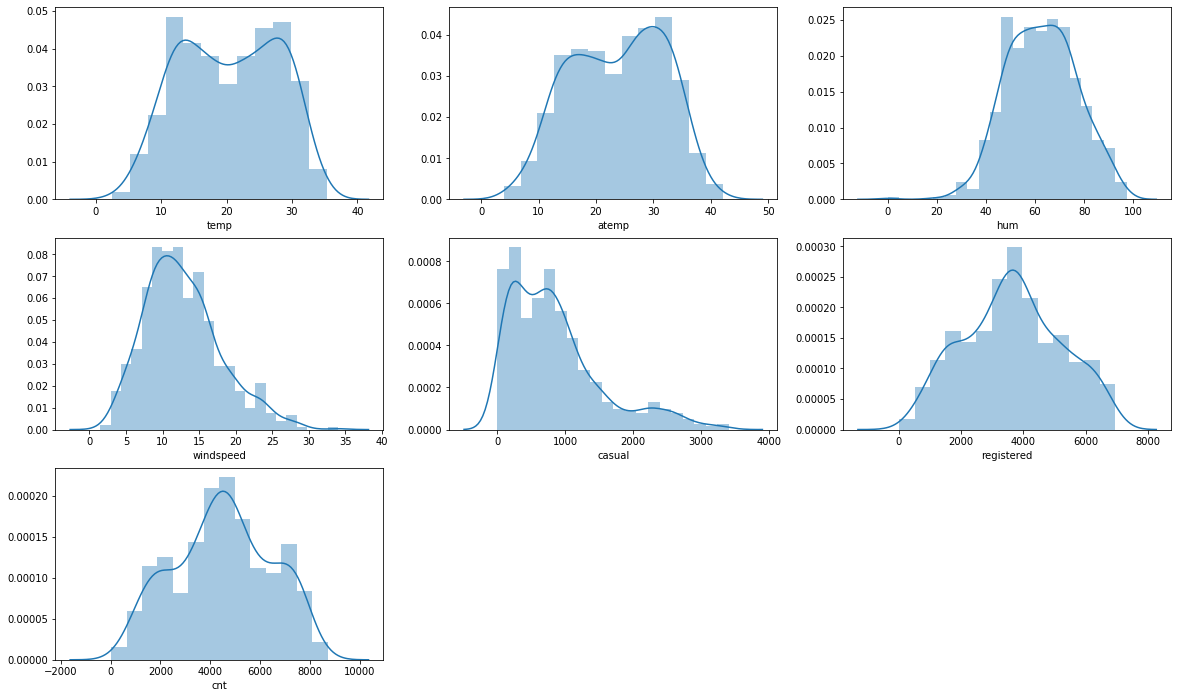

In [23]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.distplot(bike['temp'])
plt.subplot(3,3,2)
sns.distplot(bike['atemp'])
plt.subplot(3,3,3)
sns.distplot(bike['hum'])
plt.subplot(3,3,4)
sns.distplot(bike['windspeed'])
plt.subplot(3,3,5)
sns.distplot(bike['casual'])
plt.subplot(3,3,6)
sns.distplot(bike['registered'])
plt.subplot(3,3,7)
sns.distplot(bike['cnt'])
plt.show()

In [24]:
bike['dteday'] = bike['dteday'].astype('datetime64')

In [25]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 91.2+ 

In [26]:
categorical = bike.select_dtypes(include = ['object'])
categorical.head()

,season,mnth,weekday,weathersit
instant,,,,
1,spring,Jan,mon,B
2,spring,Jan,tue,B
3,spring,Jan,wed,A
4,spring,Jan,thu,A
5,spring,Jan,fri,A


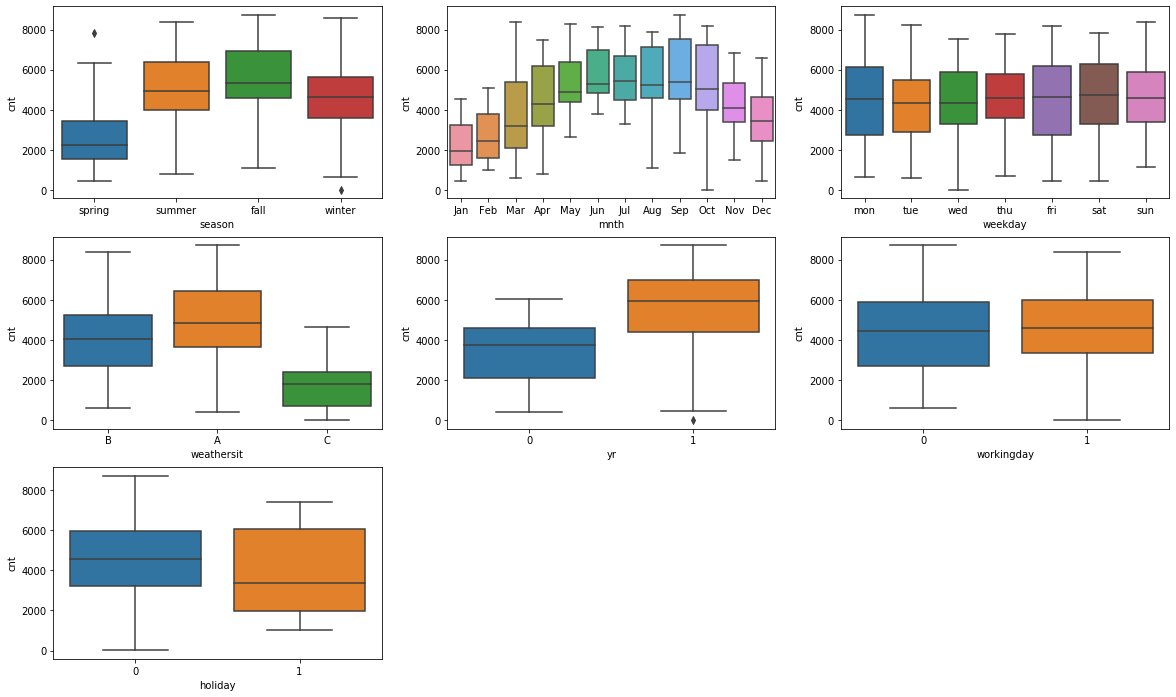

In [27]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

#### Insights:
1. There is more demand for bikes in Summer & Fall.
2. January & February has less bike demands.
3. Median bike demand is almost equal in all weekdays.
4. Bike demand is most in Clear weather & least in Rainy weather.
5. 2019 has seen a significant increase in bike demands than 2018.
6. Bike demand in working & non-working days are almost equal.
7. Bike demand is less in holidays.

In [28]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 111.2+

In [29]:
numeric = bike.select_dtypes(include = ['int64', 'float64']).drop(['yr', 'holiday', 'workingday'], axis=1)
numeric.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

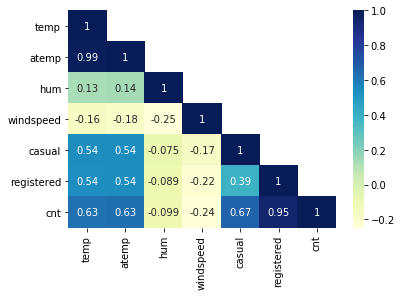

In [30]:
mask = np.array(numeric.corr())
mask[np.tril_indices_from(mask)]=False
_=sns.heatmap(numeric.corr(), mask=mask, annot=True, cmap='YlGnBu')

#### Insights:
1. atemp & temp are highly correlated.
2. Bike demand is negetively correlated with windspeed & humidity.
3. Bike demand is positively correlated with temperature.

In [31]:
numeric.drop('atemp', axis=1, inplace=True)

In [32]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   hum         730 non-null    float64
 2   windspeed   730 non-null    float64
 3   casual      730 non-null    int64  
 4   registered  730 non-null    int64  
 5   cnt         730 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 59.9 KB


In [33]:
categorical.head()

,season,mnth,weekday,weathersit
instant,,,,
1,spring,Jan,mon,B
2,spring,Jan,tue,B
3,spring,Jan,wed,A
4,spring,Jan,thu,A
5,spring,Jan,fri,A


### Dummy Encoding

In [34]:
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [36]:
bike.drop(categorical.columns, axis=1, inplace=True)
bike.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [37]:
bike = pd.concat([bike, dummies], axis=1)
bike.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,1,0
2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,1,0
3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [38]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   dteday         730 non-null    datetime64[ns]
 1   yr             730 non-null    int64         
 2   holiday        730 non-null    int64         
 3   workingday     730 non-null    int64         
 4   temp           730 non-null    float64       
 5   atemp          730 non-null    float64       
 6   hum            730 non-null    float64       
 7   windspeed      730 non-null    float64       
 8   casual         730 non-null    int64         
 9   registered     730 non-null    int64         
 10  cnt            730 non-null    int64         
 11  season_spring  730 non-null    uint8         
 12  season_summer  730 non-null    uint8         
 13  season_winter  730 non-null    uint8         
 14  mnth_Aug       730 non-null    uint8         
 15  mnth_Dec       730 non-

In [39]:
bike.drop('dteday', axis=1, inplace=True)

In [40]:
bike.drop('atemp', axis=1, inplace=True)

In [41]:
x = bike.drop('cnt', axis=1)
y = bike['cnt']

### Spliting the data into test and train

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [43]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_B,weathersit_C
instant,,,,,,,,,,,,,,,,,,,,,
654,1,0,1,19.201653,55.8333,12.208807,922,6612,0,0,...,1,0,0,0,0,1,0,0,0,0
577,1,0,1,29.246653,70.4167,11.083475,968,6248,0,0,...,0,0,0,0,0,1,0,0,0,0
427,1,0,0,16.980847,62.1250,10.792293,956,3110,1,0,...,0,0,1,0,0,0,0,0,1,0
729,1,0,0,10.489153,48.3333,23.500518,364,1432,1,0,...,0,0,0,0,0,0,1,0,0,0
483,1,0,0,15.443347,48.9583,8.708325,1120,3100,0,1,...,0,0,1,0,0,0,0,0,1,0


### Scaling the data

In [44]:
scaler = MinMaxScaler()
x_train[['temp', 'hum', 'windspeed', 'casual', 'registered']] = scaler.fit_transform(x_train[['temp', 'hum', 'windspeed', 'casual', 'registered']])

In [45]:
x_test[['temp', 'hum', 'windspeed', 'casual', 'registered']] = scaler.transform(x_test[['temp', 'hum', 'windspeed', 'casual', 'registered']])

### Model building using Gradient Boost

In [46]:
model = GradientBoostingRegressor()
model.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

### Residual analysis

In [53]:
y_train_pred = model.predict(x_train)
y_train_pred[:5]

array([7493.76004457, 7182.67988422, 4084.6625591 , 1691.09257629,
       4255.42309108])

In [54]:
Residual = y_train - y_train_pred

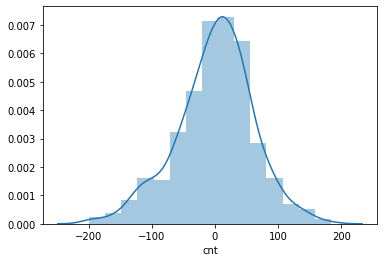

In [55]:
sns.distplot(Residual, bins =15)
plt.show()

Error term is normally distributed.

### Making predictions

In [47]:
y_pred = model.predict(x_test)
y_pred[:10]

array([6040.52784795, 6312.33400604, 2854.32024564, 4608.76231739,
       4912.25681404, 3869.19084177, 4375.50362733, 4843.93304989,
       5815.88881816, 4358.27417137])

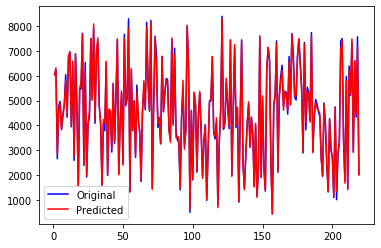

In [48]:
c = [i for i in range(1,220,1)]
plt.plot(c, y_test, color='Blue')
plt.plot(c, y_pred, color='Red')
plt.legend(['Original', 'Predicted'])
plt.show()

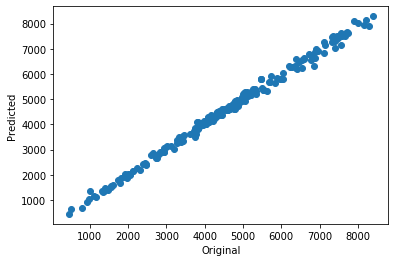

In [49]:
plt.scatter(y_test, y_pred)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.show()

### Evaluation

In [51]:
r2_score(y_test,y_pred)

0.9954938311972585